Model Accuracy: 60.00%
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


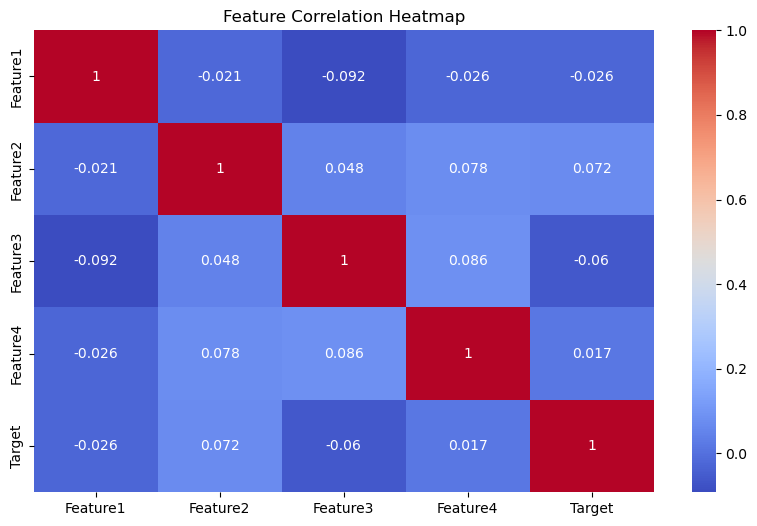

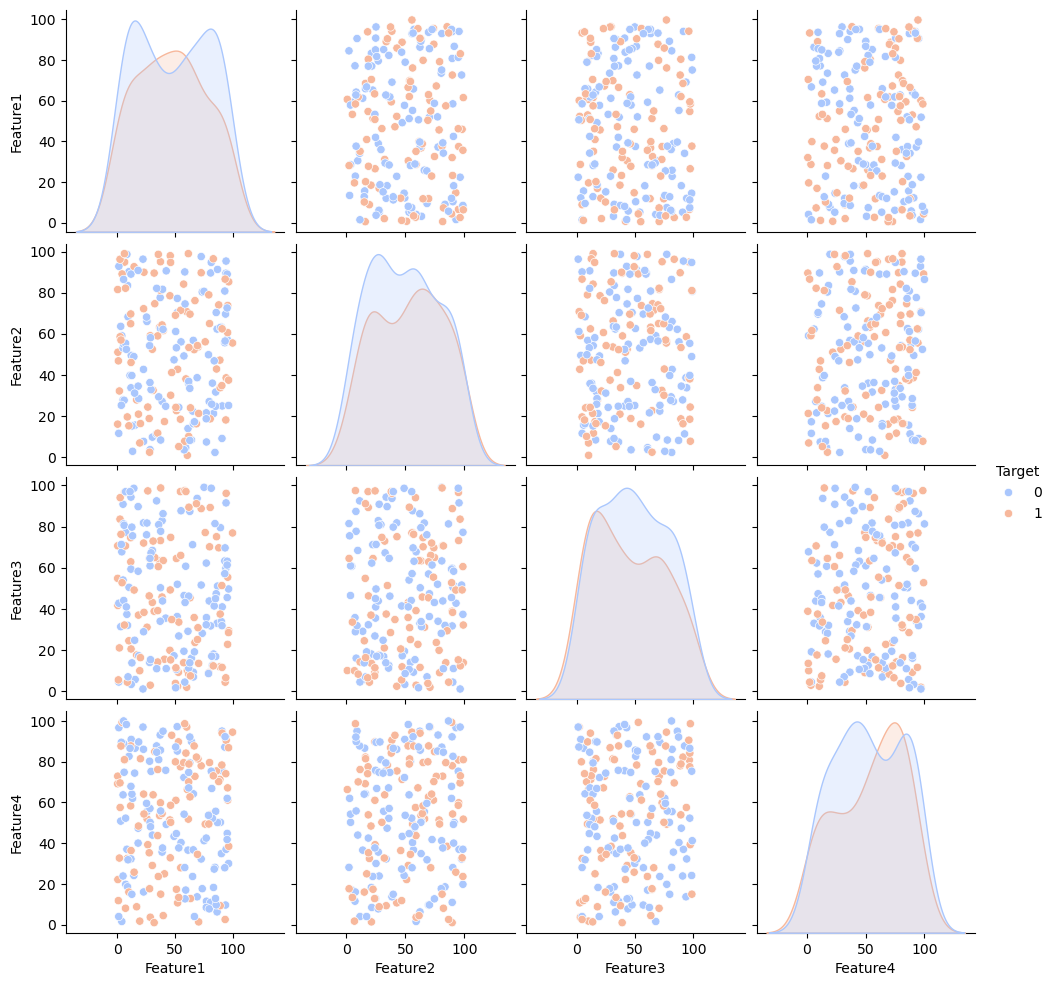

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from flask import Flask, render_template, request, jsonify

# Create the Flask application
app = Flask(__name__)

# Step 1: Generate Random Dataset
def generate_dataset():
    np.random.seed(42)
    num_samples = 200
    num_features = 4

    # Randomly generate features and target
    X = np.random.rand(num_samples, num_features) * 100
    y = np.random.choice([0, 1], size=num_samples)

    # Convert to DataFrame
    columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4']
    data = pd.DataFrame(X, columns=columns)
    data['Target'] = y
    return data

# Load and process data
data = generate_dataset()

# Step 2: Visualize the data using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")


sns.pairplot(data, hue='Target', palette='coolwarm')


# Step 3: Train-Test Split
X = data.iloc[:, :-1]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 5: Flask Routes
@app.route('/')
def index():
    return render_template('index.html', accuracy=accuracy)

@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.json.get('data', [])
    if len(input_data) != 4:
        return jsonify({"error": "Invalid input format"}), 400

    input_array = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    return jsonify({"prediction": int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)
